In [209]:
import os
import csv
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import norm



plt.figure(figsize = (11, 6))
plt.style.use('classic')

<Figure size 880x480 with 0 Axes>

In [139]:
directory = os.getcwd()
print(directory)

C:\Users\rcsall11\LouisvilleRain


In [140]:
directory += "\RainSourceData"

In [141]:
print(directory)

C:\Users\rcsall11\LouisvilleRain\RainSourceData


In [142]:
filename = directory + "\louisville_rain_data.csv"
print(filename)

C:\Users\rcsall11\LouisvilleRain\RainSourceData\louisville_rain_data.csv


In [143]:
df_louisville = pd.read_csv(filename)
df_louisville.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1872,M,M,M,M,M,M,M,2.45,4.38,3.92,0.56,2.35
1,1873,2.93,5.42,3.39,3.05,5.73,2.84,3.43,3.04,2.47,3.26,2.19,6.99
2,1874,2.39,5.18,6.63,6.01,1.14,2.95,2.83,3.23,0.62,2.04,5.90,4.77
3,1875,2.42,2.09,4.54,0.98,4.07,5.79,16.46,2.19,1.05,1.92,6.14,5.67
4,1876,11.63,2.92,6.01,4.5,1,6.52,3.61,4.29,2.66,7.61,1.63,1.24


In [144]:
df_louisville.to_sql("louisville_rain_table", sqlite3.connect("louisville_rain.db"), if_exists = "replace")
db_lou = sqlite3.connect("louisville_rain.db")

In [145]:
lou_sum_query ="""
                SELECT Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, SUM(Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Nov + Dec)  AS Total
                FROM louisville_rain_table
                GROUP BY Year
                """

df_louisville = pd.read_sql_query(lou_sum_query, db_lou)
df_louisville.set_index('Year', inplace = True)
df_louisville.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Year,,,,,,,,,,,,,
1872,M,M,M,M,M,M,M,2.45,4.38,3.92,0.56,2.35,9.74
1873,2.93,5.42,3.39,3.05,5.73,2.84,3.43,3.04,2.47,3.26,2.19,6.99,41.48
1874,2.39,5.18,6.63,6.01,1.14,2.95,2.83,3.23,0.62,2.04,5.90,4.77,41.65
1875,2.42,2.09,4.54,0.98,4.07,5.79,16.46,2.19,1.05,1.92,6.14,5.67,51.40
1876,11.63,2.92,6.01,4.5,1,6.52,3.61,4.29,2.66,7.61,1.63,1.24,46.01


In [146]:
df_louisville.dtypes

Jan       object
Feb       object
Mar       object
Apr       object
May       object
Jun       object
Jul       object
Aug      float64
Sep      float64
Oct      float64
Nov      float64
Dec      float64
Total    float64
dtype: object

In [173]:
df_louisville = df_louisville.apply(pd.to_numeric, downcast ="float", errors="coerce")
df_louisville.dtypes

Jan      float32
Feb      float32
Mar      float32
Apr      float32
May      float32
Jun      float32
Jul      float32
Aug      float32
Sep      float32
Oct      float32
Nov      float32
Dec      float32
Total    float32
dtype: object

In [148]:
df_louisville.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Year,,,,,,,,,,,,,
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.45,4.38,3.92,0.56,2.35,9.740000
1873,2.93,5.42,3.39,3.05,5.73,2.84,3.430000,3.04,2.47,3.26,2.19,6.99,41.480000
1874,2.39,5.18,6.63,6.01,1.14,2.95,2.830000,3.23,0.62,2.04,5.90,4.77,41.650002
1875,2.42,2.09,4.54,0.98,4.07,5.79,16.459999,2.19,1.05,1.92,6.14,5.67,51.400002
1876,11.63,2.92,6.01,4.50,1.00,6.52,3.610000,4.29,2.66,7.61,1.63,1.24,46.009998


In [149]:
df_louisville.dropna(inplace = True)
df_louisville.loc['Mean'] = df_louisville.mean(axis =0)
df_louisville.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Year,,,,,,,,,,,,,
2015,0.870000,2.230000,7.800000,10.840000,2.380000,6.820000,8.650000,3.470000,2.450000,4.850000,5.470,6.580000,57.560001
2016,1.010000,4.810000,5.500000,3.180000,4.560000,4.250000,4.650000,5.710000,2.280000,0.650000,1.650,5.300000,42.900002
2017,4.210000,2.060000,3.680000,4.470000,4.740000,3.260000,2.790000,4.200000,5.470000,4.890000,2.060,2.730000,39.669998
2018,1.760000,10.540000,5.050000,3.400000,4.980000,6.380000,5.130000,7.230000,10.910000,2.790000,4.760,5.900000,66.040001
Mean,3.723724,3.371448,4.574482,4.129103,4.264689,3.930138,3.910344,3.359104,2.997242,2.826552,3.522,3.764207,41.546482


In [196]:
louisvilleTotalRainFallSeries = df_louisville['Total']
louisvilleTotalRainFallMean = louisvilleTotalRainFallSeries[-1]
louisvilleTotalRainFall2018 = louisvilleTotalRainFallSeries[-2]
louisville2018RainFallVarience = (louisvilleTotalRainFall2018 - louisvilleTotalRainFallMean)
louisville2018RainFallVarience

24.493519

<BarContainer object of 2 artists>

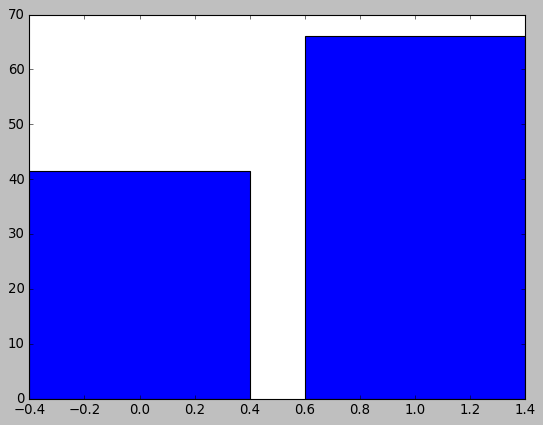

In [231]:
plt.bar((0,1),[louisvilleTotalRainFallSeries[-1], louisvilleTotalRainFallSeries[-2]],)

In [197]:
louisvilleTotalRainFallList = []
louisvilleTotalRainFallList = louisvilleTotalRainFallSeries.tolist()
louisvilleTotalRainFallList.pop()

41.54648208618164

In [198]:
louMeanStdDev = statistics.stdev(louisvilleTotalRainFallList)
louMeanStdDev

7.892217065062169

In [212]:
louisville2018RainFallVarience/louMeanStdDev
#z-score

3.1035029355408086

In [183]:
q75Lou,  q25Lou = np.percentile(louisvilleTotalRainFallList, [75, 25])
iqrLouisville = q75Lou - q25Lou
iqrLouisville

10.359996795654297

In [193]:
louisvilleTotalRainFall2018 > (q75Lou + 1.5*iqrLouisville)

True

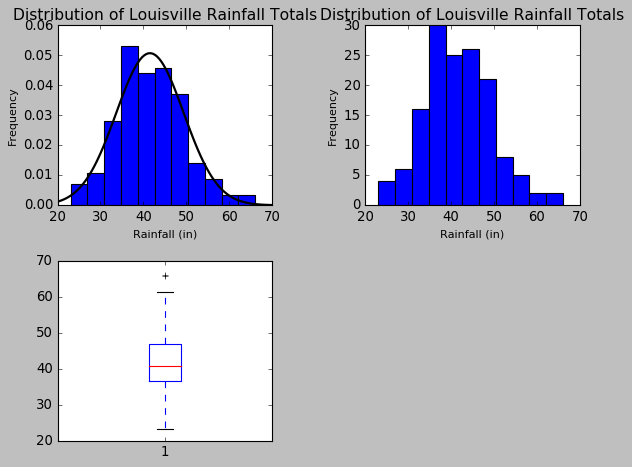

In [235]:
plt.subplot(2, 2, 1)
plt.hist(louisvilleTotalRainFallList, 'auto', density = 'True')
plt.title("Distribution of Louisville Rainfall Totals", fontsize = 14)
plt.xlabel("Rainfall (in)", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)

mu, std = norm.fit(louisvilleTotalRainFallList)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.subplot(2,2,2)
plt.hist(louisvilleTotalRainFallList, 'auto')
plt.title("Distribution of Louisville Rainfall Totals", fontsize = 14)
plt.xlabel("Rainfall (in)", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)

plt.subplot(2,2,3)
plt.boxplot(louisvilleTotalRainFallList)

plt.tight_layout()
plt.show()

C:\Users\rcsall11\LouisvilleRain\RainSourceData
